# Analiza sportowa - Analiza Danych
## Projekt realizowany w ramach przedmiotu: Metody Przetwarzania Dużych Ilości Danych
### Grupa projektowa:
+  Filip Kozak
+  Maciej Grzela
+  Paweł Owczarek
+  Szymon Tusznio

### Zaimportowanie wykorzystywanych bibliotek oraz konfiguracja wyświetlania zbiorów danych dla biblioteki Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 320)
pd.reset_option("display.max_rows")

css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

### Wczytanie danych z pliku csv oraz zapisanie ich do struktury DataFrame dostępnej w ramach biblioteki Pandas

In [4]:
transfer_df = pd.read_csv(
    'csv/transfers-data-frame-cleared.csv',
    sep=',',
    header=0,
    index_col=0,
)

transfer_df = transfer_df.fillna("")

### Wyświetlenie szczegółów dotyczących zbioru danych

In [5]:
display(transfer_df.head(10))
display(transfer_df.shape)
display(transfer_df.info())
display(transfer_df.describe())

,Club,ClubLeagueLevel,ClubLeagueNationality,Player,PlayerAge,PlayerPosition,PlayerPositionScut,PlayerNationality,Operation,Bought/Sold,PlayerMarketValue,ClubAssigned,ClubAssignedLeagueLevel,ClubAssignedLeagueNationality,TransferValue,PlayerWithoutClub,PlayerGenericPosition,PlayerAgeGroup
1,Legia Warszawa,1,Polska,Ernest Muci,19,Środkowy napastnik,ŚNP,Albania,Transfer,Kupiony,1000000,KF Tirana,1,Albania,500000,False,Napastnik,Młody
2,Legia Warszawa,1,Polska,Josip Juranovic,24,Prawy obrońca,POB,Chorwacja,Transfer,Kupiony,2500000,HNK Hajduk Split,1,Chorwacja,400000,False,Obrońca,W sile wieku
3,Legia Warszawa,1,Polska,Jasur Yakhshiboev,23,Prawy napastnik,PNP,Uzbekistan,Transfer,Kupiony,700000,Pakhtakor Tashkent,1,Uzbekistan,300000,False,Napastnik,W sile wieku
4,Legia Warszawa,1,Polska,Rafa Lopes,29,Środkowy napastnik,ŚNP,Portugalia,Transfer,Kupiony,500000,Cracovia,1,Polska,150000,False,Napastnik,W sile wieku
5,Legia Warszawa,1,Polska,Bartosz Kapustka,23,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,1500000,Leicester City,1,Anglia,0,False,Pomocnik,W sile wieku
6,Legia Warszawa,1,Polska,Artur Boruc,40,Bramkarz,BRK,Polska,Transfer,Kupiony,50000,AFC Bournemouth,2,Anglia,0,False,Bramkarz,Zbliżający się do końca kariery
7,Legia Warszawa,1,Polska,Filip Mladenovic,28,Lewy obrońca,LOB,Serbia,Transfer,Kupiony,2500000,Lechia Gdańsk,1,Polska,0,False,Obrońca,W sile wieku
8,Legia Warszawa,1,Polska,Michal Karbownik,19,Prawy obrońca,POB,Polska,Wypożyczenie,Kupiony,5000000,Brighton & Hove Albion,1,Anglia,0,False,Obrońca,Młody
9,Legia Warszawa,1,Polska,Joel Valencia,25,Lewy napastnik,LNP,Ekwador,Wypożyczenie,Kupiony,400000,FC Brentford,1,Anglia,0,False,Napastnik,W sile wieku
10,Legia Warszawa,1,Polska,Bartlomiej Ciepiela,19,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,0,Legia Warszawa II,4,Polska,0,False,Pomocnik,Młody


(12061, 18)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12061 entries, 1 to 24471
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Club                           12061 non-null  object
 1   ClubLeagueLevel                12061 non-null  int64 
 2   ClubLeagueNationality          12061 non-null  object
 3   Player                         12061 non-null  object
 4   PlayerAge                      12061 non-null  int64 
 5   PlayerPosition                 12061 non-null  object
 6   PlayerPositionScut             12061 non-null  object
 7   PlayerNationality              12061 non-null  object
 8   Operation                      12061 non-null  object
 9   Bought/Sold                    12061 non-null  object
 10  PlayerMarketValue              12061 non-null  int64 
 11  ClubAssigned                   12061 non-null  object
 12  ClubAssignedLeagueLevel        12061 non-null  int64 
 13  C

None

,ClubLeagueLevel,PlayerAge,PlayerMarketValue,ClubAssignedLeagueLevel,TransferValue
count,12061.0,12061.000000,1.206100e+04,12061.000000,1.206100e+04
mean,1.0,24.886411,1.954666e+06,1.656828,6.595562e+05
std,0.0,4.329681,5.015453e+06,1.363849,3.684380e+06
min,1.0,15.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.0,22.000000,2.000000e+05,1.000000,0.000000e+00
50%,1.0,24.000000,4.500000e+05,1.000000,0.000000e+00
75%,1.0,28.000000,1.500000e+06,2.000000,0.000000e+00
max,1.0,40.000000,8.000000e+07,8.000000,8.000000e+07


### Przypisanie typu string dla wszystkich kolumn tekstowych

In [6]:
transfer_df['Club'] = transfer_df['Club'].astype("string")
transfer_df['ClubLeagueNationality'] = transfer_df['ClubLeagueNationality'].astype("string")
transfer_df['TransferValue'] = transfer_df['TransferValue'].astype("string")
transfer_df['Player'] = transfer_df['Player'].astype("string")
transfer_df['PlayerPosition'] = transfer_df['PlayerPosition'].astype("string")
transfer_df['PlayerPositionScut'] = transfer_df['PlayerPositionScut'].astype("string")
transfer_df['PlayerGenericPosition'] = transfer_df['PlayerGenericPosition'].astype("string")
transfer_df['PlayerNationality'] = transfer_df['PlayerNationality'].astype("string")
transfer_df['Operation'] = transfer_df['Operation'].astype("string")
transfer_df['Bought/Sold'] = transfer_df['Bought/Sold'].astype("string")
transfer_df['ClubAssigned'] = transfer_df['ClubAssigned'].astype("string")
transfer_df['ClubAssignedLeagueNationality'] = transfer_df['ClubAssignedLeagueNationality'].astype("string")
transfer_df['PlayerAgeGroup'] = transfer_df['PlayerAgeGroup'].astype("string")

transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12061 entries, 1 to 24471
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Club                           12061 non-null  string
 1   ClubLeagueLevel                12061 non-null  int64 
 2   ClubLeagueNationality          12061 non-null  string
 3   Player                         12061 non-null  string
 4   PlayerAge                      12061 non-null  int64 
 5   PlayerPosition                 12061 non-null  string
 6   PlayerPositionScut             12061 non-null  string
 7   PlayerNationality              12061 non-null  string
 8   Operation                      12061 non-null  string
 9   Bought/Sold                    12061 non-null  string
 10  PlayerMarketValue              12061 non-null  int64 
 11  ClubAssigned                   12061 non-null  string
 12  ClubAssignedLeagueLevel        12061 non-null  int64 
 13  C

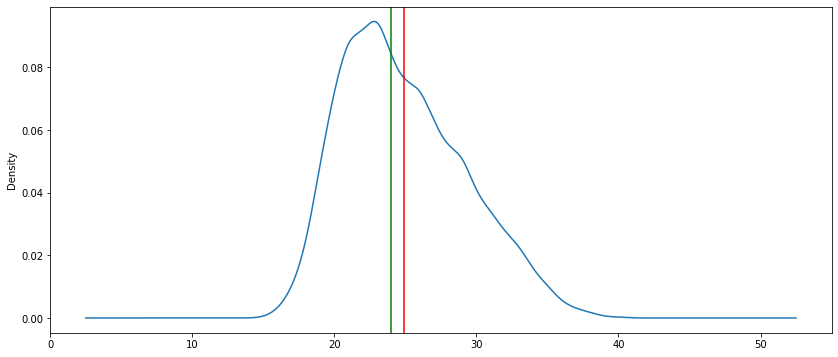

In [7]:
ax = transfer_df['PlayerAge'].plot(kind='density', figsize=(14,6))
ax.axvline(transfer_df['PlayerAge'].mean(), color='red')
ax.axvline(transfer_df['PlayerAge'].median(), color='green')